In [7]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 1. Spambase dataset #

## Linear SVM ##

In [2]:
# Spambase dataset
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 

pd.options.mode.copy_on_write = True
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(X.shape)
print(Y.shape)

(4601, 57)
(4601, 1)


In [4]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

In [5]:
# 20-80 partition
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 20-80 partition
X_train = X_shuffled[:920][:,:]            # Shape: (920, 57)
Y_train = Y_shuffled[:920]                 # Shape: (920, )
X_test = X_shuffled[920:][:,:]             # Shape: (3681, 57)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(920, 57)
(920,)
(3681, 57)
(3681,)


In [6]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.08152173913043478
C* = 1
Training error = 0.061956521739130466
Test error = 0.0950828579190437


In [7]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling
np.random.seed(1)               # Set the random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,:]           # Shape: (2300, 57)
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
X_test = X_shuffled[2300:][:,:]            # Shape: (2301, 57)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2300, 57)
(2300,)
(2301, 57)
(2301,)


In [8]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.07869565217391306
C* = 10
Training error = 0.06565217391304345
Test error = 0.07953063885267275


In [9]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,:]           # Shape: (3680, 57)
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
X_test = X_shuffled[3680:][:,:]            # Shape: (921, 57)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3680, 57)
(3680,)
(921, 57)
(921,)


In [10]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.08043478260869566
C* = 10
Training error = 0.07282608695652171
Test error = 0.05646036916395225


## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [8]:
%config InlineBackend.figure_format = 'retina'
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [12]:
# 20-80 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 20-80 partition (cross-validation creates several 
# (training subset, validation subset) pairs
X_train = X_shuffled[:920][:,:]            # Shape: (920, 57)
Y_train = Y_shuffled[:920]                 # Shape: (920, )
X_test = X_shuffled[920:][:,:]             # Shape: (3681, 57)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(920, 57)
(920,)
(3681, 57)
(3681,)


In [13]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


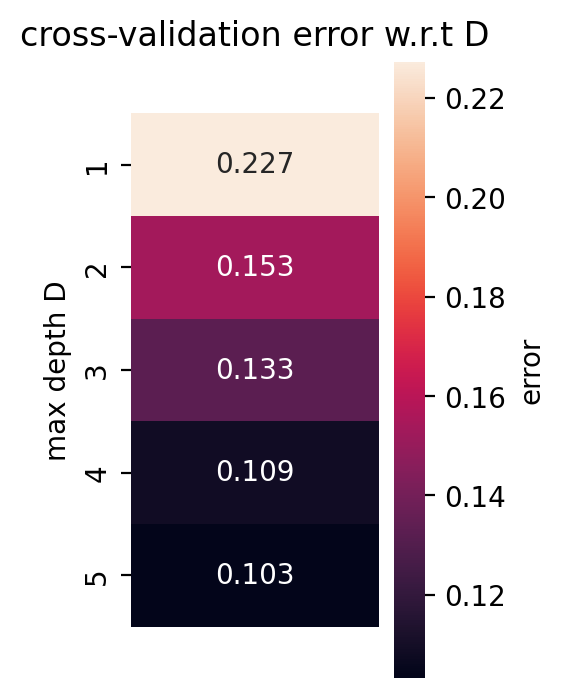

In [14]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [15]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 5
Training error = 0.06304347826086953
Cross-validated validation error = 0.1032608695652174
Testing error = 0.11056778049443083


In [16]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,:]           # Shape: (2300, 57)
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
X_test = X_shuffled[2300:][:,:]            # Shape: (2301, 57)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2300, 57)
(2300,)
(2301, 57)
(2301,)


In [17]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


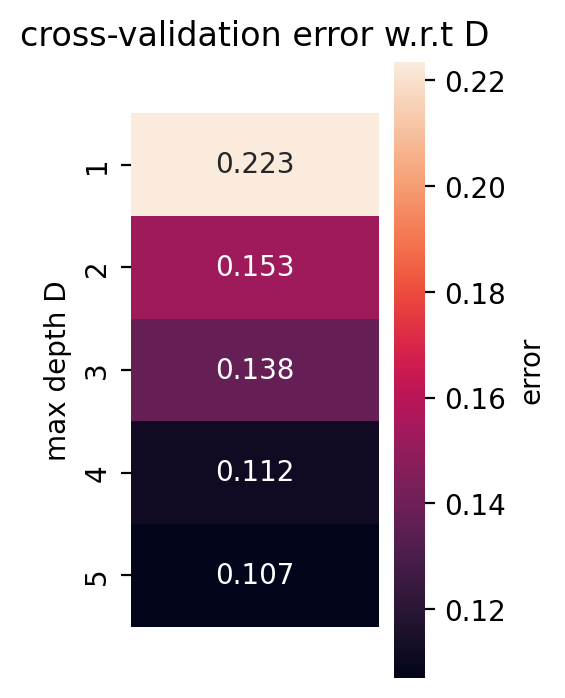

In [18]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [19]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 5
Training error = 0.08304347826086955
Cross-validated validation error = 0.1069565217391304
Testing error = 0.09343763581051712


In [20]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,:]           # Shape: (3680, 57)
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
X_test = X_shuffled[3680:][:,:]            # Shape: (921, 57)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3680, 57)
(3680,)
(921, 57)
(921,)


In [21]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


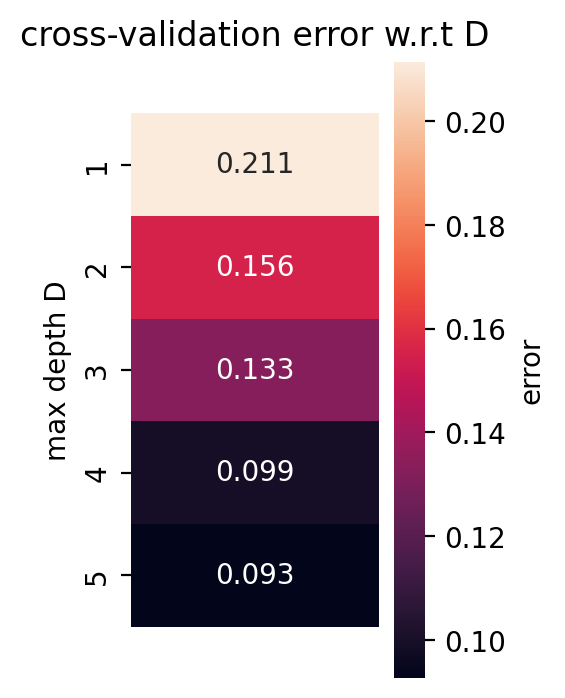

In [22]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [23]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 5
Training error = 0.08315217391304353
Cross-validated validation error = 0.09266304347826093
Testing error = 0.08794788273615639


# Random Forests ##

In [24]:
%config InlineBackend.figure_format = 'retina'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [25]:
# 20-80 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 20-80 partition 
X_train = X_shuffled[:920][:,:]            # Shape: (920, 57)
Y_train = Y_shuffled[:920]                 # Shape: (920, )
X_test = X_shuffled[920:][:,:]             # Shape: (3681, 57)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(920, 57)
(920,)
(3681, 57)
(3681,)


In [26]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 8


In [27]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.05760869565217386
Test error = 0.06845965770171147


In [28]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,:]           # Shape: (2300, 57)
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
X_test = X_shuffled[2300:][:,:]            # Shape: (2301, 57)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2300, 57)
(2300,)
(2301, 57)
(2301,)


In [29]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [30]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.05217391304347829
Test error = 0.044328552803129084


In [31]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,:]           # Shape: (3680, 57)
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
X_test = X_shuffled[3680:][:,:]            # Shape: (921, 57)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3680, 57)
(3680,)
(921, 57)
(921,)


In [32]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 2


In [33]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.00027173913043476716
Cross-validated validation error = 0.04538043478260856
Test error = 0.03365906623235615


# 2. Gender by Name dataset

In [4]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Linear SVM ##

In [36]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

In [37]:
# Gender dataset
# 20-80 partition
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:29454][:,[0,1]]         # Shape: (29454, 2)
Y_train = Y[:29454]                  # Shape: (29454, )
X_test = X[29454:][:,[0,1]]          # Shape: (117815, 2)
Y_test = Y[29454:]                   # Shape: (117815, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Note: you may need to restart the kernel to use updated packages.
(29454, 2)
(29454,)
(117815, 2)
(117815,)


In [38]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.38935321037328097
C* = 0.01
Training error = 0.3894547429890677
Test error = 0.3907312311675084


In [39]:
# Gender dataset
# 50-50 partition

# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:73635][:,[0,1]]         # Shape: (73635, 2)
Y_train = Y[:73635]                  # Shape: (73635, )
X_test = X[73635:][:,[0,1]]          # Shape: (73634, 2)
Y_test = Y[73635:]                   # Shape: (73634, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(73635, 2)
(73635,)
(73634, 2)
(73634,)


In [40]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.39145786650370074
C* = 0.01
Training error = 0.391376383513275
Test error = 0.38960262922019717


In [41]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:117816][:,[0,1]]         # Shape: (117816, 2)
Y_train = Y[:117816]                  # Shape: (117816, )
X_test = X[117816:][:,[0,1]]          # Shape: (29453, 2)
Y_test = Y[117816:]                   # Shape: (29453, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(117816, 2)
(117816,)
(29453, 2)
(29453,)


In [42]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.39177192010874345
C* = 0.01
Training error = 0.39178040334080255
Test error = 0.38542763046209216


## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [43]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [44]:
# Gender dataset
# 20-80 partition

# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:29454][:,[0,1]]         # Shape: (29454, 2)
Y_train = Y[:29454]                  # Shape: (29454, )
X_test = X[29454:][:,[0,1]]          # Shape: (117815, 2)
Y_test = Y[29454:]                   # Shape: (117815, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(29454, 2)
(29454,)
(117815, 2)
(117815,)


In [45]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


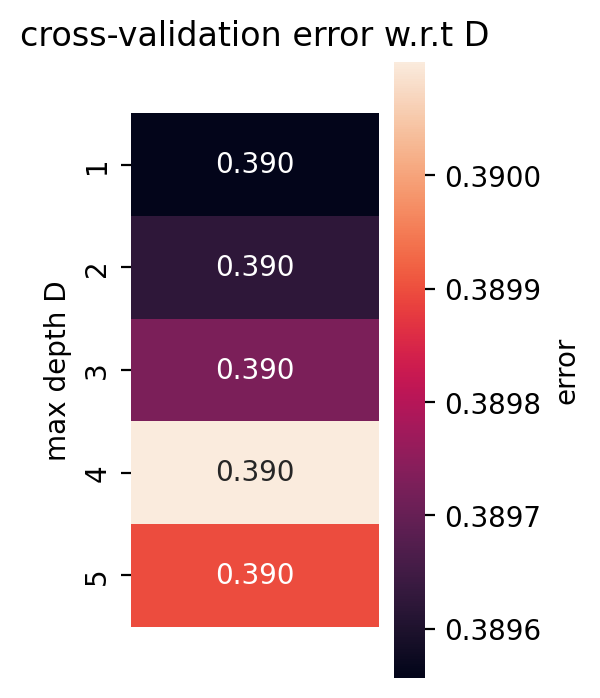

In [46]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [47]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 1
Training error = 0.38955659672709986
Cross-validated validation error = 0.3895565939122122
Testing error = 0.39083308577006326


In [48]:
# Gender dataset
# 50-50 partition

# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:73635][:,[0,1]]         # Shape: (73635, 2)
Y_train = Y[:73635]                  # Shape: (73635, )
X_test = X[73635:][:,[0,1]]          # Shape: (73634, 2)
Y_test = Y[73635:]                   # Shape: (73634, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(73635, 2)
(73635,)
(73634, 2)
(73634,)


In [49]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


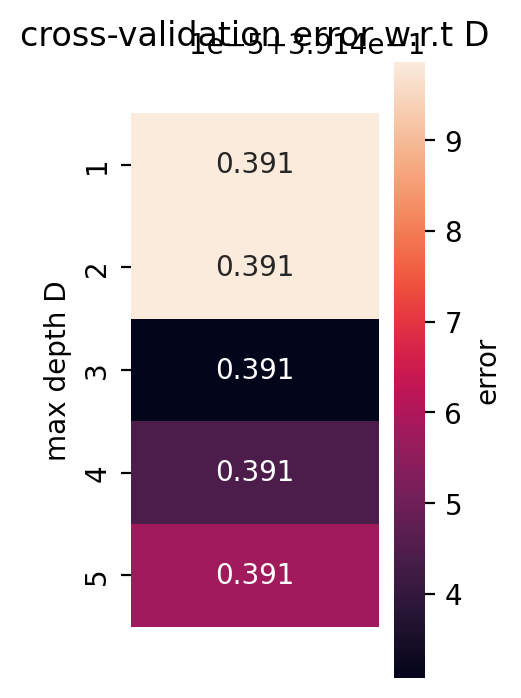

Best max depth D: 3
Training error = 0.39138996401167925
Cross-validated validation error = 0.3914307055068921
Testing error = 0.3896162099030339


In [50]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [51]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:117816][:,[0,1]]         # Shape: (117816, 2)
Y_train = Y[:117816]                  # Shape: (117816, )
X_test = X[117816:][:,[0,1]]          # Shape: (29453, 2)
Y_test = Y[117816:]                   # Shape: (29453, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(117816, 2)
(117816,)
(29453, 2)
(29453,)


In [52]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


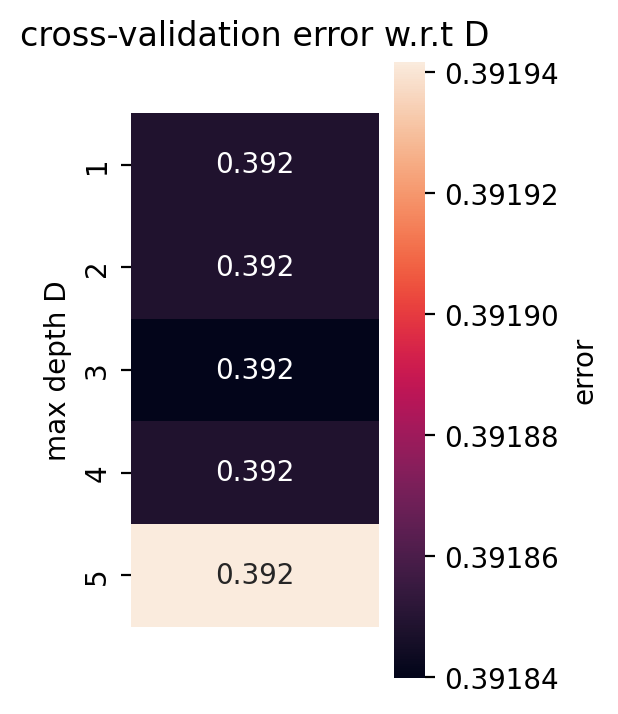

Best max depth D: 3
Training error = 0.39176342771779726
Cross-validated validation error = 0.3918398177740301
Testing error = 0.38542763046209216


In [53]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

## Random Forests ##

In [2]:
# Gender dataset
# 20-80 partition

%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:29454][:,[0,1]]         # Shape: (29454, 2)
Y_train = Y[:29454]                  # Shape: (29454, )
X_test = X[29454:][:,[0,1]]          # Shape: (117815, 2)
Y_test = Y[29454:]                   # Shape: (117815, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Note: you may need to restart the kernel to use updated packages.
(29454, 2)
(29454,)
(117815, 2)
(117815,)


In [5]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [6]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.371155021389285
Cross-validated validation error = 0.3980444573302373
Test error = 0.3959597674319908


In [7]:
# Gender dataset
# 50-50 partition

# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:73635][:,[0,1]]         # Shape: (73635, 2)
Y_train = Y[:73635]                  # Shape: (73635, )
X_test = X[73635:][:,[0,1]]          # Shape: (73634, 2)
Y_test = Y[73635:]                   # Shape: (73634, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(73635, 2)
(73635,)
(73634, 2)
(73634,)


In [8]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 2


In [9]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.37903171046377404
Cross-validated validation error = 0.3951925035648808
Test error = 0.3926718635412989


In [10]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

X_and_Y = np.hstack([X,Y])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X = X_and_Y[:,:num]
Y = X_and_Y[:,num]
Y = Y.astype(int)


# 20-80 partition (using count and probability)
X_train = X[:117816][:,[0,1]]         # Shape: (117816, 2)
Y_train = Y[:117816]                  # Shape: (117816, )
X_test = X[117816:][:,[0,1]]          # Shape: (29453, 2)
Y_test = Y[117816:]                   # Shape: (29453, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(117816, 2)
(117816,)
(29453, 2)
(29453,)


In [11]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [12]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.38432810484144764
Cross-validated validation error = 0.39465776881637604
Test error = 0.3882117271585237


# 1. Occupancy Detection dataset #

In [18]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Linear SVM ##

In [14]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e

In [20]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:4112]                # Shape: (4112, 5)
Y_train = Y_shuffled[:4112]                # Shape: (4112, )
X_test  = X_shuffled[4112:]                # Shape: (16448, 5)
Y_test  = Y_shuffled[4112:]                # Shape: (16448, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4112, 5)
(4112,)
(16448, 5)
(16448,)


In [21]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.013620869585783412
C* = 100
Training error = 0.013618677042801508
Test error = 0.01112597276264593


In [22]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:10280]                # Shape: (10280, 5)
Y_train = Y_shuffled[:10280]                # Shape: (10280, )
X_test  = X_shuffled[10280:]                # Shape: (10280, 5)
Y_test  = Y_shuffled[10280:]                # Shape: (10280, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10280, 5)
(10280,)
(10280, 5)
(10280,)


In [23]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.01225680933852138
C* = 0.1
Training error = 0.012062256809338479
Test error = 0.011186770428015524


In [24]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:16448]                # Shape: (16448, 5)
Y_train = Y_shuffled[:16448]                # Shape: (16448, )
X_test  = X_shuffled[16448:]                # Shape: (4112, 5)
Y_test  = Y_shuffled[16448:]                # Shape: (4112, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16448, 5)
(16448,)
(4112, 5)
(4112,)


In [25]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.011429939163519198
C* = 10
Training error = 0.011429961089494123
Test error = 0.011186770428015524


## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [12]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [24]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:4112]                # Shape: (4112, 5)
Y_train = Y_shuffled[:4112]                # Shape: (4112, )
X_test  = X_shuffled[4112:]                # Shape: (16448, 5)
Y_test  = Y_shuffled[4112:]                # Shape: (16448, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4112, 5)
(4112,)
(16448, 5)
(16448,)


In [25]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


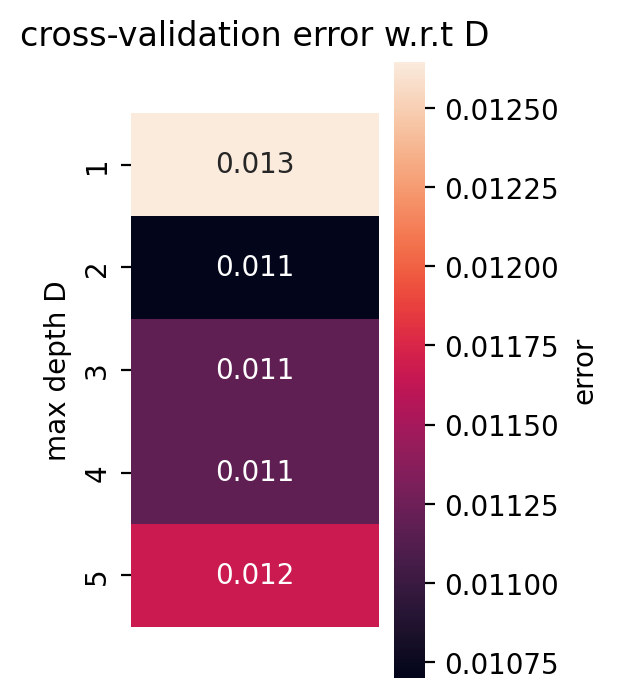

Best max depth D: 2
Training error = 0.010214007782101131
Cross-validated validation error = 0.01069997900979447
Testing error = 0.010578793774319029


In [26]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [27]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:10280]                # Shape: (10280, 5)
Y_train = Y_shuffled[:10280]                # Shape: (10280, )
X_test  = X_shuffled[10280:]                # Shape: (10280, 5)
Y_test  = Y_shuffled[10280:]                # Shape: (10280, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10280, 5)
(10280,)
(10280, 5)
(10280,)


In [28]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


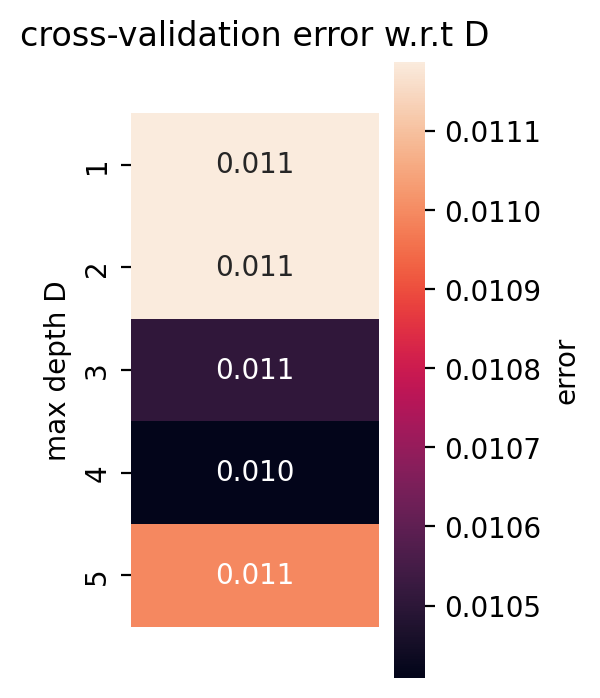

Best max depth D: 4
Training error = 0.009922178988326813
Cross-validated validation error = 0.010408560311283899
Testing error = 0.010894941634241206


In [29]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [9]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:16448]                # Shape: (16448, 5)
Y_train = Y_shuffled[:16448]                # Shape: (16448, )
X_test  = X_shuffled[16448:]                # Shape: (4112, 5)
Y_test  = Y_shuffled[16448:]                # Shape: (4112, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16448, 5)
(16448,)
(4112, 5)
(4112,)


In [10]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


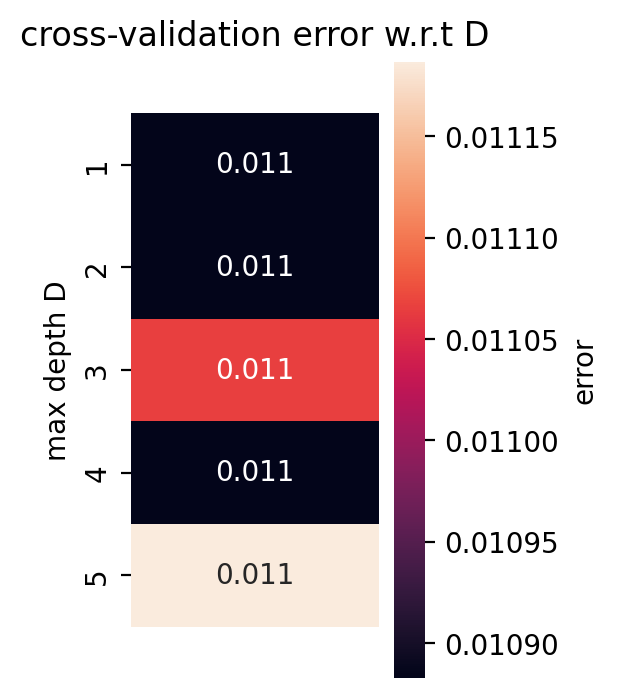

Best max depth D: 1
Training error = 0.010761186770428033
Cross-validated validation error = 0.010882715804084953
Testing error = 0.010214007782101131


In [13]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

## Random Forests ##

In [36]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:4112]                # Shape: (4112, 5)
Y_train = Y_shuffled[:4112]                # Shape: (4112, )
X_test  = X_shuffled[4112:]                # Shape: (16448, 5)
Y_test  = Y_shuffled[4112:]                # Shape: (16448, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4112, 5)
(4112,)
(16448, 5)
(16448,)


In [37]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 4


In [38]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.008268071532255505
Test error = 0.008511673151750943


In [39]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:10280]                # Shape: (10280, 5)
Y_train = Y_shuffled[:10280]                # Shape: (10280, )
X_test  = X_shuffled[10280:]                # Shape: (10280, 5)
Y_test  = Y_shuffled[10280:]                # Shape: (10280, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10280, 5)
(10280,)
(10280, 5)
(10280,)


In [40]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [41]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.007101167315175183
Test error = 0.008073929961089465


In [42]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:16448]                # Shape: (16448, 5)
Y_train = Y_shuffled[:16448]                # Shape: (16448, )
X_test  = X_shuffled[16448:]                # Shape: (4112, 5)
Y_test  = Y_shuffled[16448:]                # Shape: (4112, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16448, 5)
(16448,)
(4112, 5)
(4112,)


In [43]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=-1,
    max_depth=20
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [44]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.007174102493251455
Test error = 0.008268482490272344


# Classification Error Graphs #

In [5]:
# 80-20 partition
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

pd.options.mode.copy_on_write = True
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,:]           # Shape: (3680, 57)
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
X_test = X_shuffled[3680:][:,:]            # Shape: (921, 57)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Note: you may need to restart the kernel to use updated packages.
(3680, 57)
(3680,)
(921, 57)
(921,)


In [8]:
C_list = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros(len(C_list))

best_error = 1.0
opt_C = None

for i, C in enumerate(C_list):

    fold_errors = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_va = X_train[train_index], X_train[val_index]
        Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

        # Standardize
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        # Linear SVM
        clf = LinearSVC(C=C, max_iter=5000)
        clf.fit(X_tr, Y_tr)

        fold_errors.append(calc_error(X_va, Y_va, clf))

    cv_error = np.mean(fold_errors)
    cv_errors[i] = cv_error

    if cv_error < best_error:
        best_error = cv_error
        opt_C = C

# Train classifier on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

opt_classifier = LinearSVC(C=opt_C, max_iter=5000)
opt_classifier.fit(X_train_scaled, Y_train)

# Test error
X_test_scaled = scaler.transform(X_test)
train_error = calc_error(X_train_scaled, Y_train, opt_classifier)
test_error = calc_error(X_test_scaled, Y_test, opt_classifier)

print("Best CV error =", best_error)
print("C* =", opt_C)
print("Training error =", train_error)
print("Test error =", test_error)

Best CV error = 0.08043478260869566
C* = 10
Training error = 0.07282608695652171
Test error = 0.05646036916395225


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

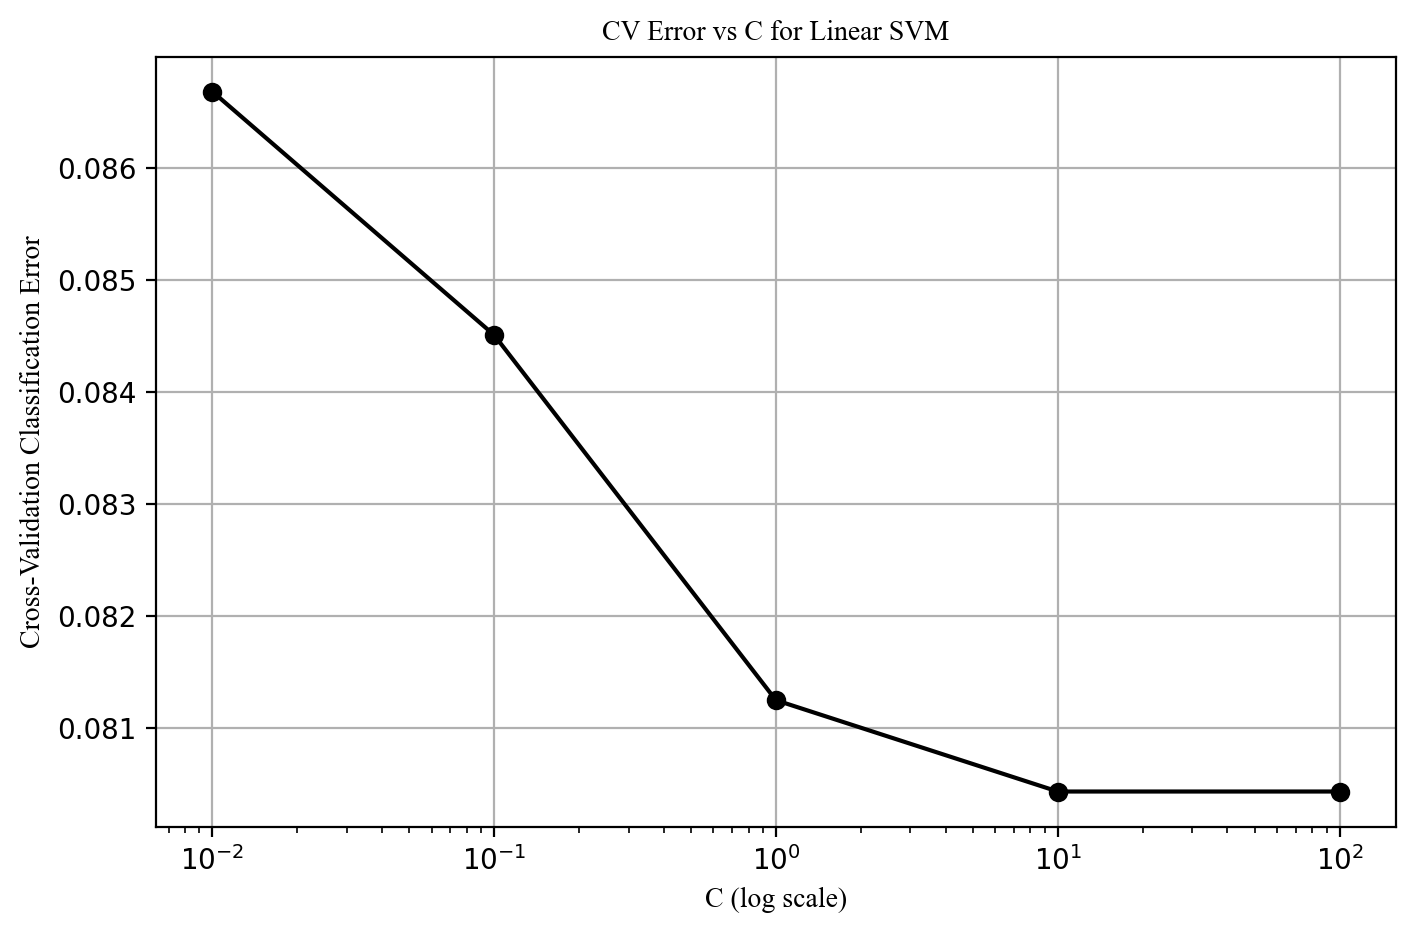

In [15]:
plt.figure(figsize=(8,5))
plt.semilogx(C_list, cv_errors, color='black',marker='o')
plt.xlabel("C (log scale)", font='Times New Roman')
plt.ylabel("Cross-Validation Classification Error", font='Times New Roman')
plt.title("CV Error vs C for Linear SVM", font='Times New Roman')
plt.grid(True)
plt.show()

In [19]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2",]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(int).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)
X_shuffled = X_and_Y[:, :-1]
Y_shuffled = X_and_Y[:, -1].astype(int)

X_train = X_shuffled[:16448]                # Shape: (16448, 5)
Y_train = Y_shuffled[:16448]                # Shape: (16448, )
X_test  = X_shuffled[16448:]                # Shape: (4112, 5)
Y_test  = Y_shuffled[16448:]                # Shape: (4112, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16448, 5)
(16448,)
(4112, 5)
(4112,)


In [20]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'entropy'


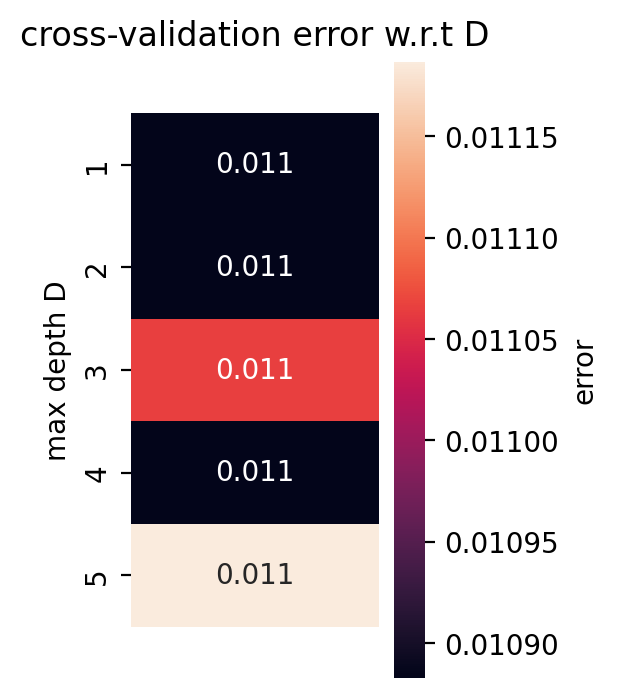

Best max depth D: 1
Training error = 0.010761186770428033
Cross-validated validation error = 0.010882715804084953
Testing error = 0.010214007782101131


In [21]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

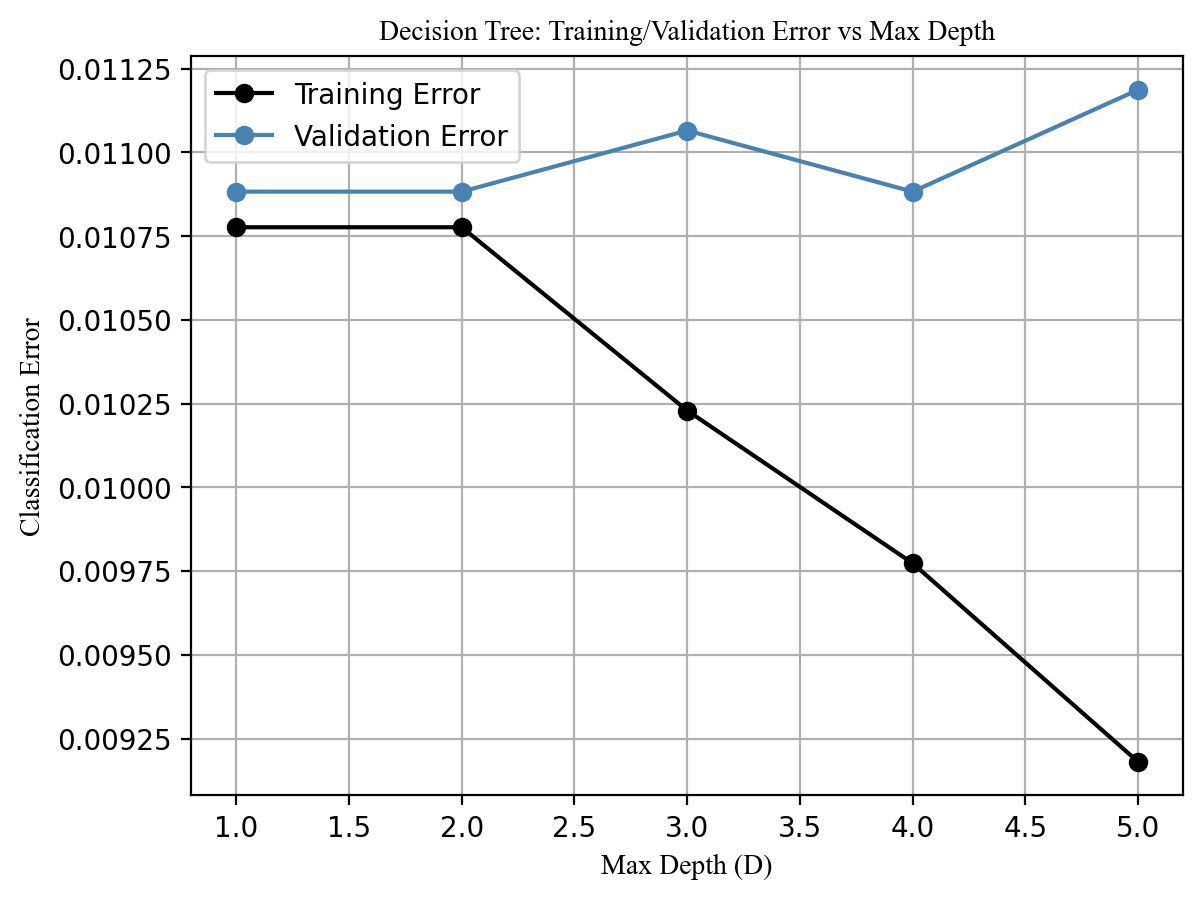

In [27]:
max_depths = grid_search.cv_results_["param_max_depth"].data.astype(int)

mean_train_acc = grid_search.cv_results_["mean_train_score"]
mean_val_acc = grid_search.cv_results_["mean_test_score"]

train_error = 1 - mean_train_acc
val_error = 1 - mean_val_acc

plt.plot(max_depths, train_error, color='black', marker='o', label="Training Error")
plt.plot(max_depths, val_error, color='steelblue', marker='o', label="Validation Error")

plt.xlabel("Max Depth (D)", font="Times New Roman")
plt.ylabel("Classification Error", font="Times New Roman")
plt.title("Decision Tree: Training/Validation Error vs Max Depth", font="Times New Roman")
plt.legend()
plt.grid(True)
plt.show()
